# PRUEBA

### Modelado

#### K-Means Clustering

In [307]:
# Preparación del entorno
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [308]:
# Se prepara el dataset para entrenar el modelo
X = h1_df.drop(columns=['Provincias', 'Población Total'])
scaler = StandardScaler() 
h1_df_scaled = scaler.fit_transform(X) # escalado de los datos (Media = 0 & Desviación estándar = 1)

¿Cuántos grupos queremos sacar del conjunto de datos?

Para responder a la hipótesis, sería beneficioso que el modelo identificara un grupo de provincias que presenten una edad media inferior a la media nacional y, simultáneamente, una renta media superior a la nacional.

Para determinar el número óptimo de grupos, se utilizará el método del codo (Elbow Method). Este método nos indica la ganancia que se obtiene al hacer n clusters. El objetivo es buscar el punto óptimo ganancia/clusters.

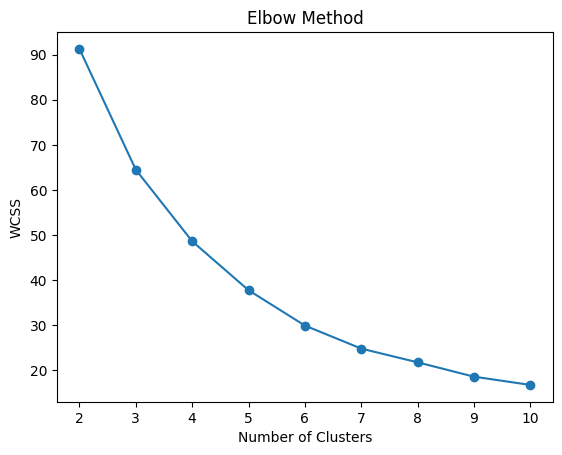

In [309]:
wcss = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(h1_df_scaled)
    wcss.append(kmeans.inertia_)

# Se dibuja la gráfica
plt.plot(range(2, 11), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Entrenamos el modelo y vemos los resultados.

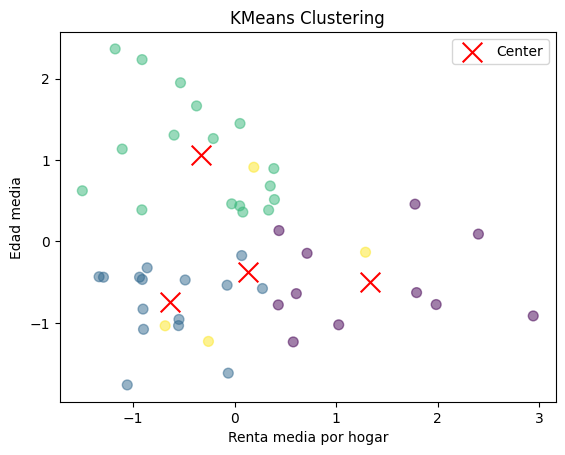

In [310]:
k = 4 # grupos

# Se entrena el modelo
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(h1_df_scaled)

# Clusters
cluster_labels = kmeans.labels_

# Gráfica para visualizar los clusters
plt.scatter(h1_df_scaled[:, 0], h1_df_scaled[:, 1], c=cluster_labels, cmap='viridis', s= 50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c= 'red', marker='x', s=200, label= 'Center')
plt.xlabel('Renta media por hogar')
plt.ylabel('Edad media')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

In [311]:
# Agregar etiquetas de clusters al DataFrame original
h1_df['Cluster_K-Means'] = cluster_labels
h1_df.head(5)

,Provincias,Población Total,Renta media por hogar,Edad media,Porcentaje de hogares con dispositivos de energía renovable,Cluster_K-Means
0,Albacete,385727,30908,43.677523,4.314062,1
1,Alicante/Alacant,1901594,28965,43.766889,4.036060,1
2,Almería,740534,28442,40.320448,6.713842,1
3,Araba/Álava,334412,38586,44.565691,10.445424,3
4,Asturias,1004686,33242,48.683390,5.031368,2


<br>

#### DBSCAN

In [312]:
# Preparación del entorno
from sklearn.cluster import DBSCAN
# https://www.youtube.com/watch?v=HMis89lGdkA

X = h1_df.drop(columns=['Provincias', 'Población Total', 'Cluster_K-Means'])

In [313]:
# Entrenamiento del modelo
clusters_DBSCAN = DBSCAN(eps = 2, min_samples=2).fit_predict(X)

:)